# Libreta de Guillermo
Se hacen pruebas sobre las distintas etapas del proyecto individualmente para después juntar lo mejor de todas

Para almacenar llaves de git: `git config credential.helper store`

# 1. Cargar los datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

In [4]:
subdir = "./data/"
zip_url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_file = "wine+quality.zip"
white_wine_file = "winequality-white.csv"
red_wine_file = "winequality-red.csv"

# Descarga y Descomprime el ZIP
if not os.path.exists(zip_file):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(zip_url, subdir + zip_file)  
    with ZipFile(subdir + zip_file, "r") as zip_ref:
        zip_ref.extractall(subdir)
    
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(subdir + red_wine_file, sep=";")

#df = pd.read_csv("../data/winequality-red.csv", sep=";")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [7]:
df.isna().sum()
# Usar pandas profiler

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 2. Análisis exploratorio
Poner:
- distribuciones de las variables
- correlación con la variable objetivo
- outliers (boxplot, histograms) PyOD

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [7]:
fig = px.histogram(df, x=df['quality'])
fig.update_layout(
    bargap=0.2,
    width=600,  
    height=400
)
fig.show()

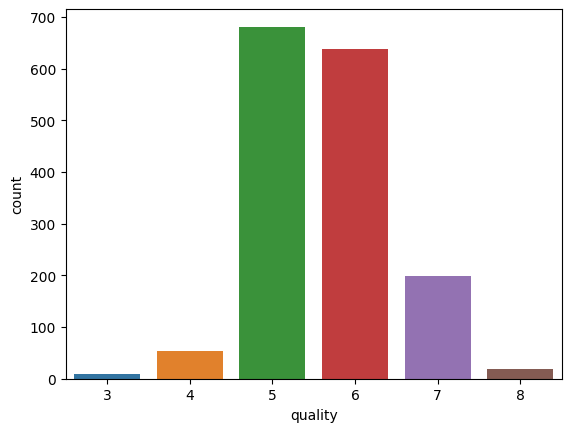

In [11]:
#checking the quality , our target variable
sns.countplot(df, x="quality")
plt.show()

In [8]:
fig = make_subplots(rows=3, cols=4, subplot_titles=df.columns[:-1])

for i, column in enumerate(df.columns[:-1]): 
    row = (i // 4) + 1
    col = (i % 4) + 1
    box_trace = go.Box(x=df['quality'], y=df[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=1200,
    width=1750 
)
fig.show()

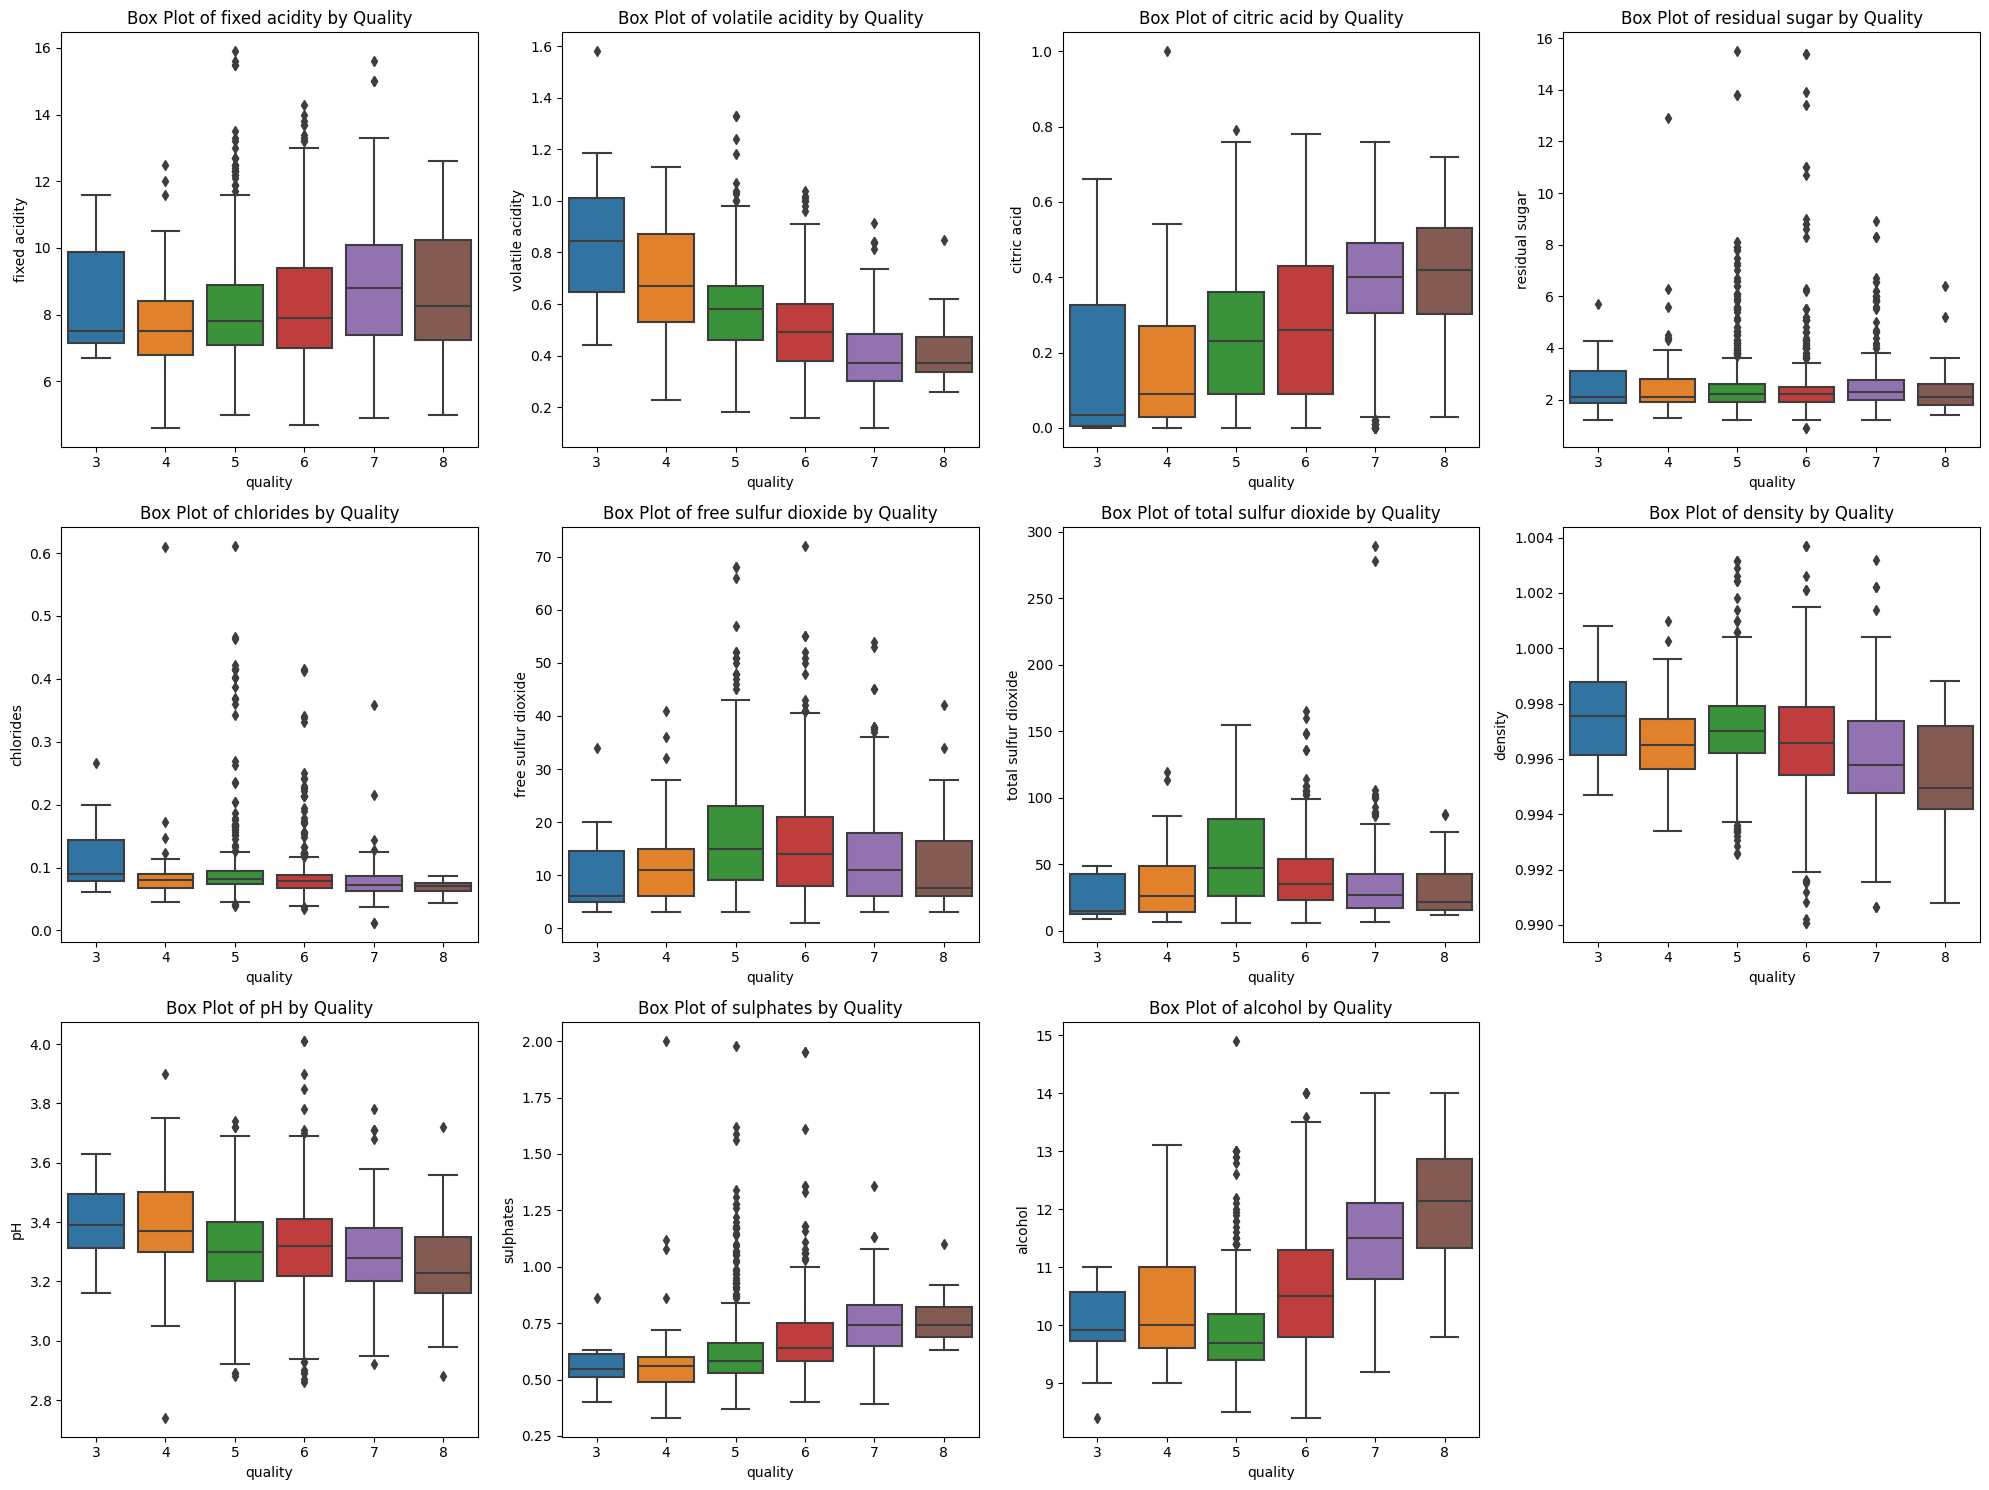

In [13]:
# Create a figure with subplots
plt.figure(figsize=(20, 15))

# Loop through each independent variable in the DataFrame
for i, column in enumerate(df.columns[:-1]):  # Exclude the dependent variable
    plt.subplot(3, 4, i + 1)  # Create a subplot for each variable
    sns.boxplot(x=df['quality'], y=df[column])  # Create a box plot with target on x-axis and variable on y-axis
    plt.title(f'Box Plot of {column} by Quality')  # Set the title of the plot

plt.tight_layout()  # Adjust the layout
plt.show()

<Axes: >

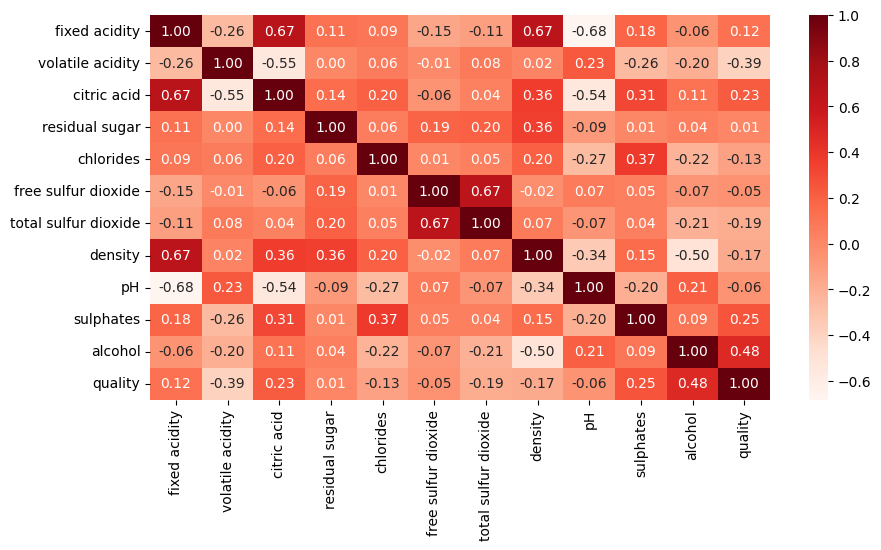

In [35]:
# correlation and headtmap
plt.figure(figsize = (10,5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Reds', fmt = '.2f')
# Quitar parte de abajo

# Limpieza

In [44]:
quality_corr = corr_matrix.loc["quality"].abs().sort_values().drop("quality")
quality_corr

residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
Name: quality, dtype: float64

In [45]:
# Variables con baja correlación
CORR_THRESH = 0.10 # Una correlación menor se considera muy baja
low_corr_vars = quality_corr[quality_corr < CORR_THRESH]
low_corr_vars

residual sugar         0.013732
free sulfur dioxide    0.050656
pH                     0.057731
Name: quality, dtype: float64

In [46]:
low_corr_names = low_corr_vars.index.tolist()
low_corr_names

['residual sugar', 'free sulfur dioxide', 'pH']

In [47]:
df_trans = df.drop(columns=low_corr_names)
df_trans.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


<Axes: >

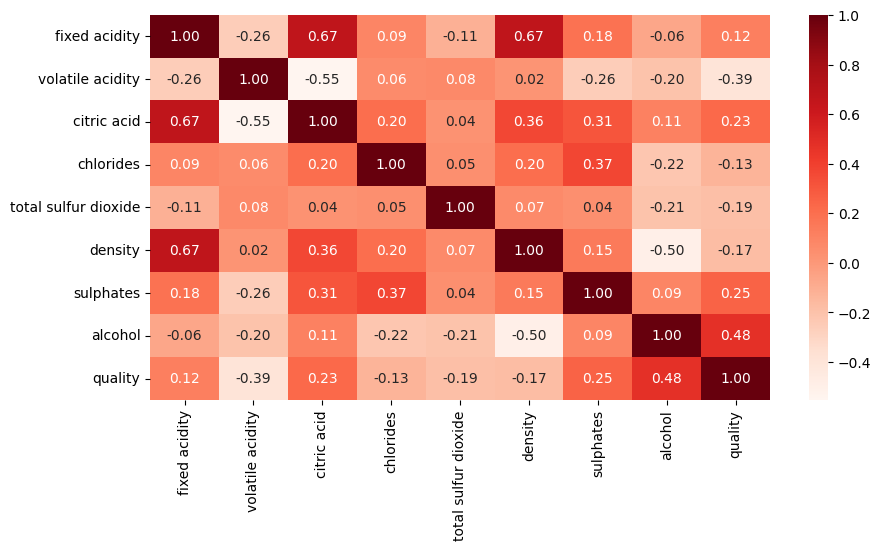

In [48]:
# correlation and headtmap
plt.figure(figsize = (10,5))
trans_corr_matrix = df_trans.corr()
sns.heatmap(trans_corr_matrix, annot=True,cmap='Reds', fmt = '.2f')

Se puede ver que las variables *fixed acidity*, *citric acid* y *density* tienen una correlación de 0.67, nos vendría bien dejar solo una para representar las tres

In [61]:
high_corr_names = ["fixed acidity", "citric acid", "density"]
trans_quality_corr = (trans_corr_matrix
                      .loc["quality"]   # Nos fijamos en corr con calidad
                      [high_corr_names] # Filtramos las variables con alta corr.
                      .abs()            # Tomamos el valor absoluto
                      .sort_values()    # Ordenamos los valores (ascendente)
                    )
trans_quality_corr

fixed acidity    0.124052
density          0.174919
citric acid      0.226373
Name: quality, dtype: float64

Ahora quedémonos solo con una variable de dos que tengan alta correlación, y la forma de decidir a cual no le damos cuello será aquella que tenga una mayor correlación con la variable objetivo *quality*.  
En este caso, quedemonos con *citric acid* por tener la correlación más alta (22%).

In [64]:
df_trans2 = df_trans.drop(columns=["fixed acidity", "density"])

In [65]:
df_trans2.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.56,9.4,5
1,0.88,0.00,0.098,67.0,0.68,9.8,5
2,0.76,0.04,0.092,54.0,0.65,9.8,5
3,0.28,0.56,0.075,60.0,0.58,9.8,6
4,0.70,0.00,0.076,34.0,0.56,9.4,5


<Axes: >

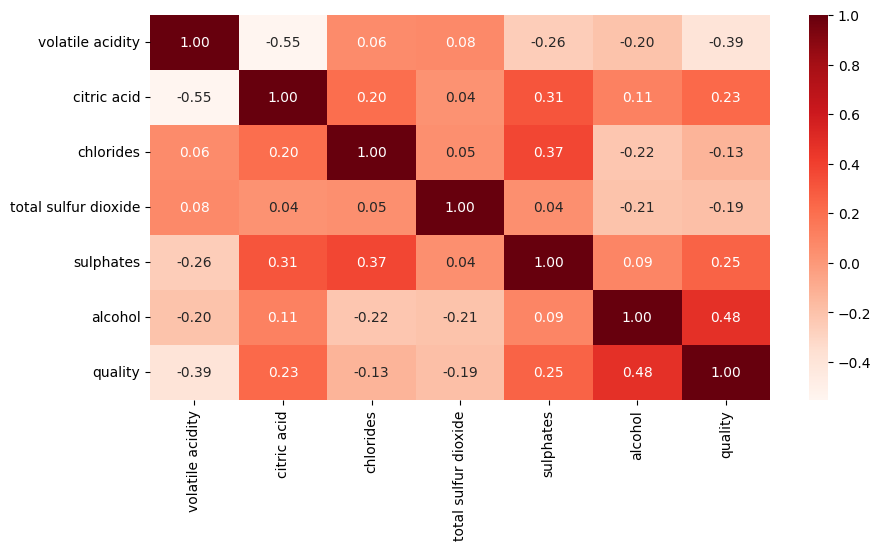

In [66]:
# correlation and headtmap
plt.figure(figsize = (10,5))
trans2_corr_matrix = df_trans2.corr()
sns.heatmap(trans2_corr_matrix, annot=True,cmap='Reds', fmt = '.2f')

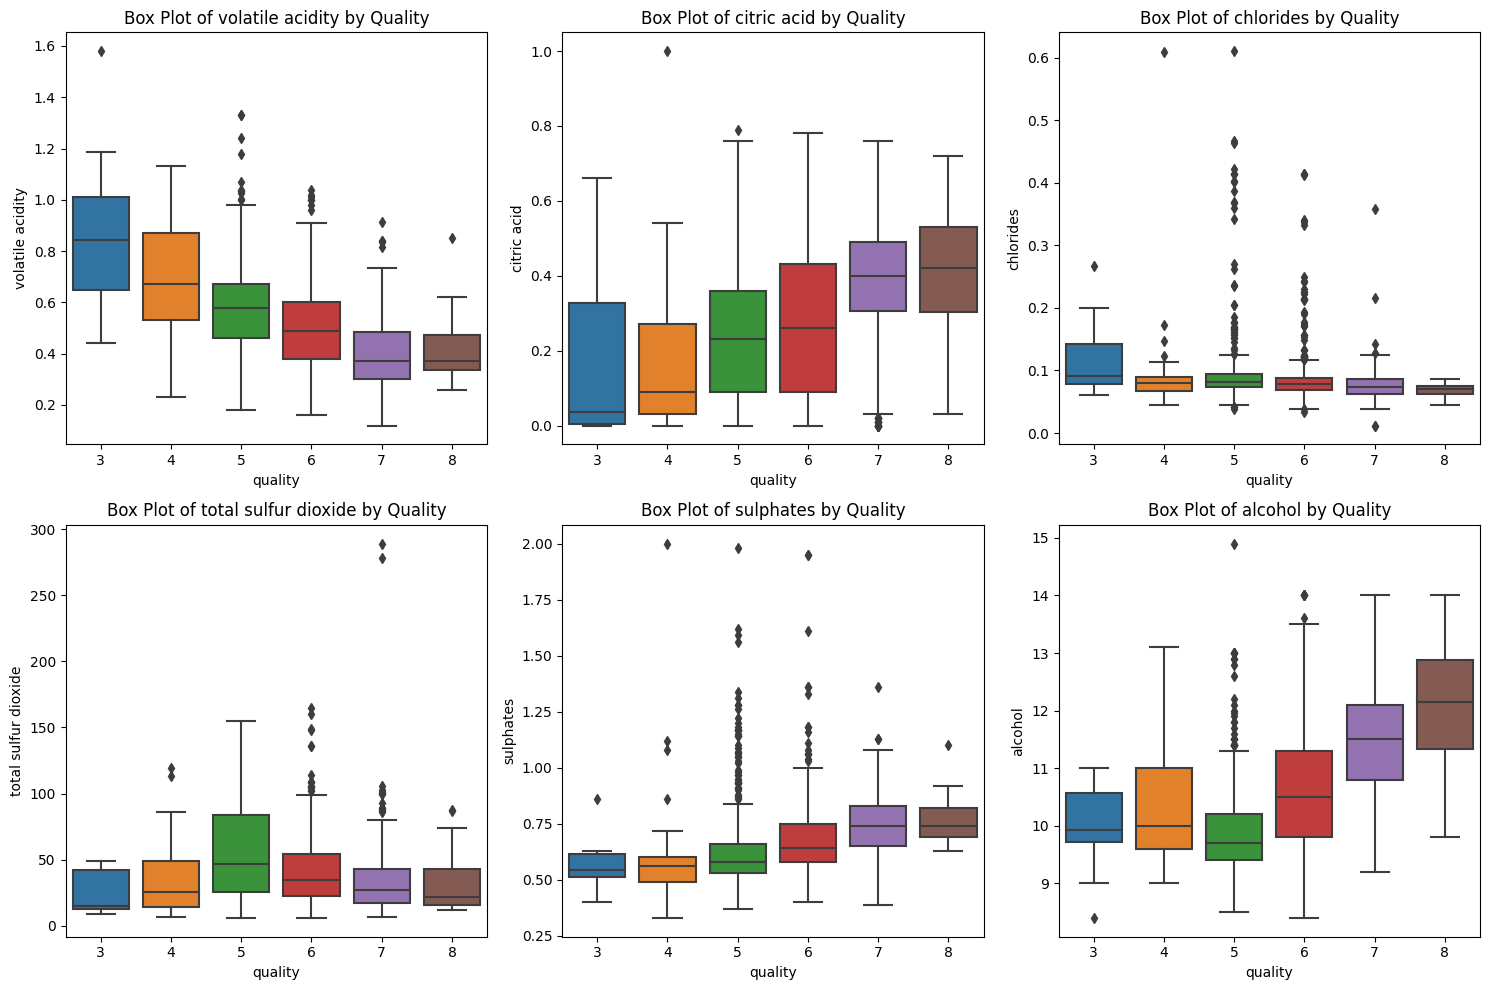

In [70]:
# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through each independent variable in the DataFrame
for i, column in enumerate(df_trans2.columns[:-1]):  # Exclude the dependent variable
    plt.subplot(2, 3, i + 1)  # Create a subplot for each variable
    sns.boxplot(x=df_trans2['quality'], y=df_trans2[column])  # Create a box plot with target on x-axis and variable on y-axis
    plt.title(f'Box Plot of {column} by Quality')  # Set the title of the plot

plt.tight_layout()  # Adjust the layout
plt.show()

## Outliers

In [76]:
X = df_trans2.drop(columns=["quality"])
y = df_trans2["quality"].to_numpy()

In [77]:
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest(n_estimators=10, warm_start=True)
clf.fit(X)  # fit 10 trees  
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(X)  # fit the added trees  

IsolationForest(n_estimators=20, warm_start=True)

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

# 3. Entrenamiento
- Separar usando K-Folds
- Usar escalamiento
- Usar pipelines

In [ ]:
import sklearn